In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Metazygia monitor 1.csv")
df = df[6904:]
df2 = df[:6904]

min_day=1440
total_time = len(df.index)
num_days = total_time//min_day

df = df.drop(['Monitor 1 Spider 17', 
              'Monitor 1 Spider 22', 'Monitor 1 Spider 23', 'Monitor 1 Spider 24'] , axis = 1)
df2 = df2.drop(['Monitor 1 Spider 12', 'Monitor 1 Spider 14', 'Monitor 1 Spider 17', 
              'Monitor 1 Spider 22', 'Monitor 1 Spider 23', 'Monitor 1 Spider 24'] , axis = 1)
#display(df)
names = df2.columns[2:]
#print(names)

The period is 24.54814814814815 hours


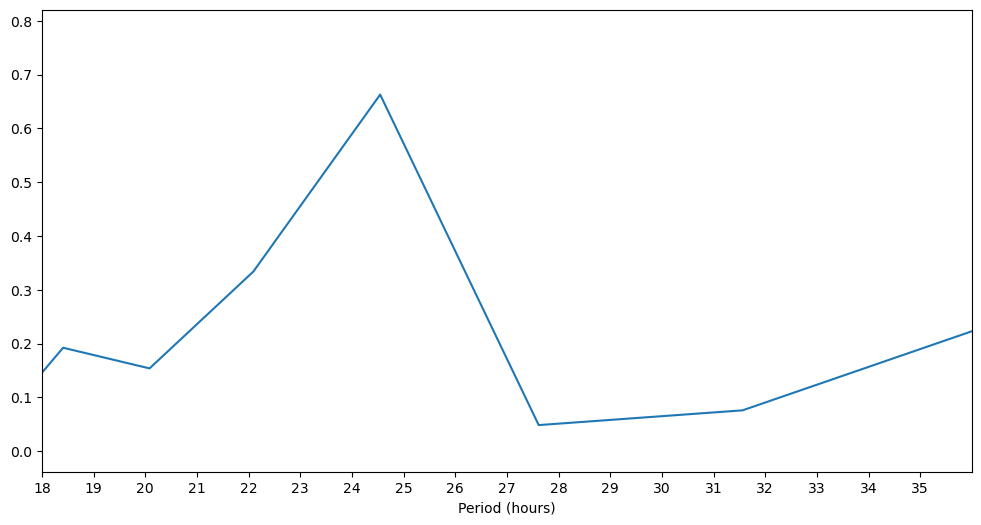

In [87]:
# Perform Fast Fourier Transform on a dataframe
X = np.fft.fft(df['Monitor 1 Spider 25'])

# Take variables for the length of the dataframe
N = len(X)
n = np.arange(N)

# Get the sampling rate
sample_rate = 60  # sample rate
T = N / sample_rate  # sampling interval
freq = n / T  # frequency

# Get the one-sided spectrum
n_oneside = N // 2
# Get the one-sided frequency
f_oneside = freq[:n_oneside]

# Convert frequency to hour
t_h = 1 / f_oneside

# Taking out infinities
sorted_t_h = t_h[np.isfinite(t_h)]

# Make a dataframe to find the max frequency
amp = np.abs(X[:n_oneside]) / n_oneside
df_freq = pd.DataFrame()
df_freq['freq'] = sorted_t_h
df_freq['amp'] = amp[1:]

# filtering data
filter = df_freq["freq"]>= 18 
df_freq.where(filter, inplace = True)
max_amp = df_freq['amp'].max()
max_freq = df_freq.loc[df_freq.amp == max_amp, 'freq'].values[0]
print('The period is', max_freq, 'hours')

# Generate more x values with finer resolution
#t_h = np.linspace(18, 36, num=6628)

plt.figure(figsize=(12, 6))
plt.plot(t_h, amp)
plt.xlim(18, 36)
plt.xticks(range(18, 36, 1))
plt.xlabel('Period (hours)')
plt.show()